<a href="https://colab.research.google.com/github/sapan-s2/AI_Austin_course/blob/main/decision_tree_hands_on_quiz_back_pain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

In [2]:
data = pd.read_csv("backpain.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [7]:
df.tail()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


In [8]:
df.shape

(310, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
sacral_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,NaN,NaN,NaN,0.472979,0.285787,0.00322,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,NaN,NaN,NaN,21.321526,8.639423,7.027,13.0544,21.90715,28.954075,36.7439
thoracic_slope,310.0,NaN,NaN,NaN,13.064511,3.399713,7.0378,10.4178,12.93845,15.889525,19.324
cervical_tilt,310.0,NaN,NaN,NaN,11.933317,2.893265,7.0306,9.54114,11.953835,14.37181,16.82108


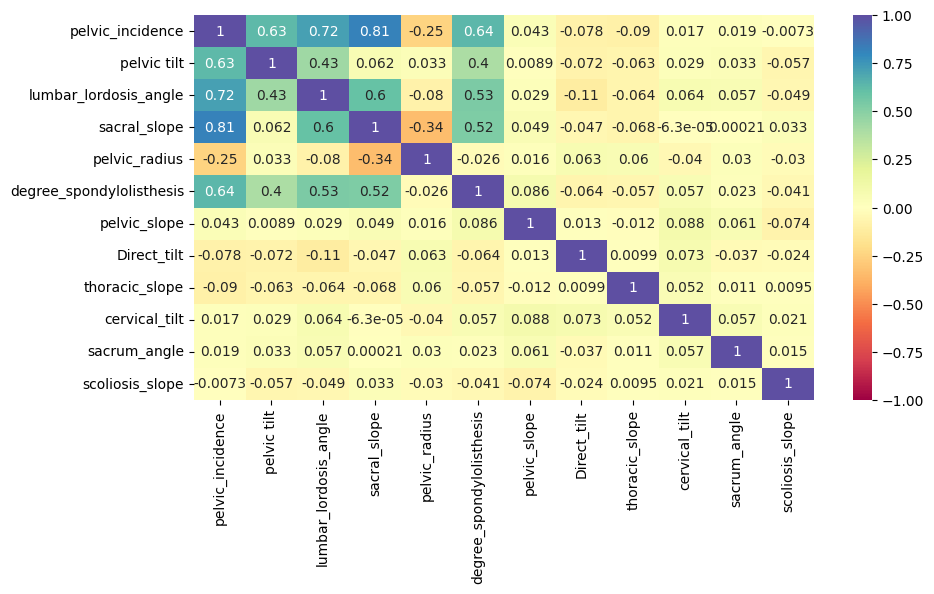

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [14]:

replaceStruct = {

                "Status":     {"Abnormal": 1, "Normal": 0 },

                    }
df=df.replace(replaceStruct)

In [116]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


ValueError: ignored

In [115]:

y=df['Status']
X=df.drop('Status',axis=1)

ValueError: ignored

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [114]:
y_train.value_counts(1)

1    0.663594
0    0.336406
Name: Status, dtype: float64

In [21]:
y_train.value_counts()

1    144
0     73
Name: Status, dtype: int64

In [22]:
y_train.shape


(217,)

In [89]:
dTree = DecisionTreeClassifier(criterion = 'gini',random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [62]:
dTree1 = DecisionTreeClassifier(max_depth=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [63]:
dTree2 = DecisionTreeClassifier(max_depth=2)
dTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [64]:
dTree5 = DecisionTreeClassifier(max_depth=5)
dTree5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
dTree8 = DecisionTreeClassifier(max_depth=8)
dTree8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [112]:
get_recall_score(dTree)
get_recall_score(dTree1)
get_recall_score(dTree2)
get_recall_score(dTree5)
get_recall_score(dTree8)

Recall on training set :  1.0
Recall on test set :  0.7878787878787878
Recall on training set :  0.6875
Recall on test set :  0.7121212121212122
Recall on training set :  0.8888888888888888
Recall on test set :  0.8636363636363636
Recall on training set :  0.9652777777777778
Recall on test set :  0.8333333333333334
Recall on training set :  1.0
Recall on test set :  0.803030303030303


In [38]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.7741935483870968


In [39]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
from sklearn import metrics
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

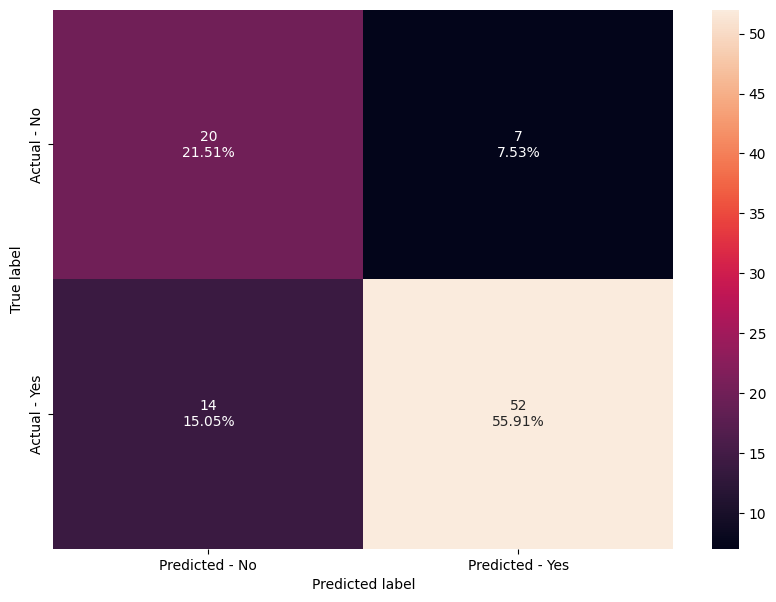

In [41]:
make_confusion_matrix(dTree,y_test)

In [52]:
# Accuracy on train and test
# print("Accuracy on training set : ",dTree.score(X_train, y_train))
# print("Accuracy on test set : ",dTree.score(X_test, y_test))
# Recall on train and test
# get_recall_score(dTree)

get_recall_score(dTree1)
get_recall_score(dTree2)
get_recall_score(dTree5)
get_recall_score(dTree8)

Recall on training set :  1.0
Recall on test set :  0.7878787878787878
Recall on training set :  1.0
Recall on test set :  0.7878787878787878
Recall on training set :  1.0
Recall on test set :  0.7878787878787878
Recall on training set :  1.0
Recall on test set :  0.7878787878787878


In [42]:
feature_names = list(X.columns)
print(feature_names)

['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


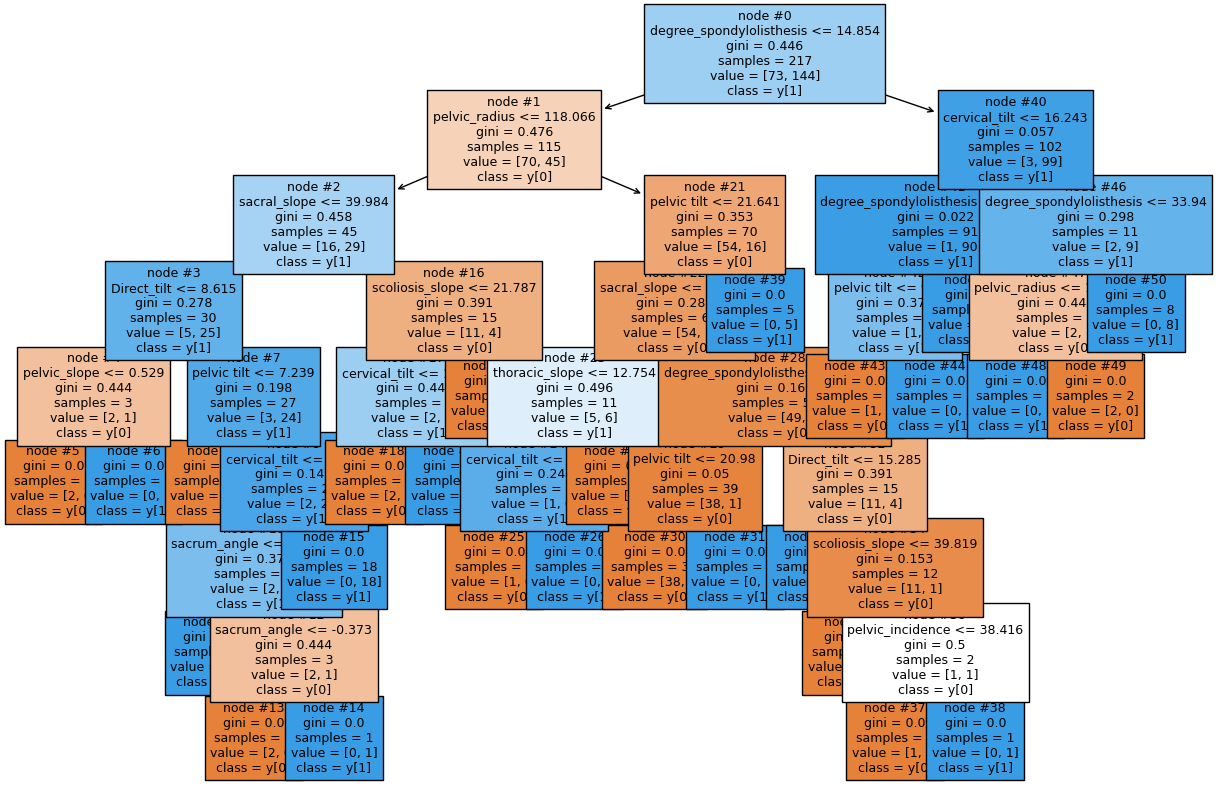

In [45]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [43]:
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- Direct_tilt <= 8.62
|   |   |   |   |--- pelvic_slope <= 0.53
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- pelvic_slope >  0.53
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Direct_tilt >  8.62
|   |   |   |   |--- pelvic tilt <= 7.24
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- pelvic tilt >  7.24
|   |   |   |   |   |--- cervical_tilt <= 9.42
|   |   |   |   |   |   |--- sacrum_angle <= -12.82
|   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |--- sacrum_angle >  -12.82
|   |   |   |   |   |   |   |--- sacrum_angle <= -0.37
|   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- sacrum_angle >  -0.37
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |---

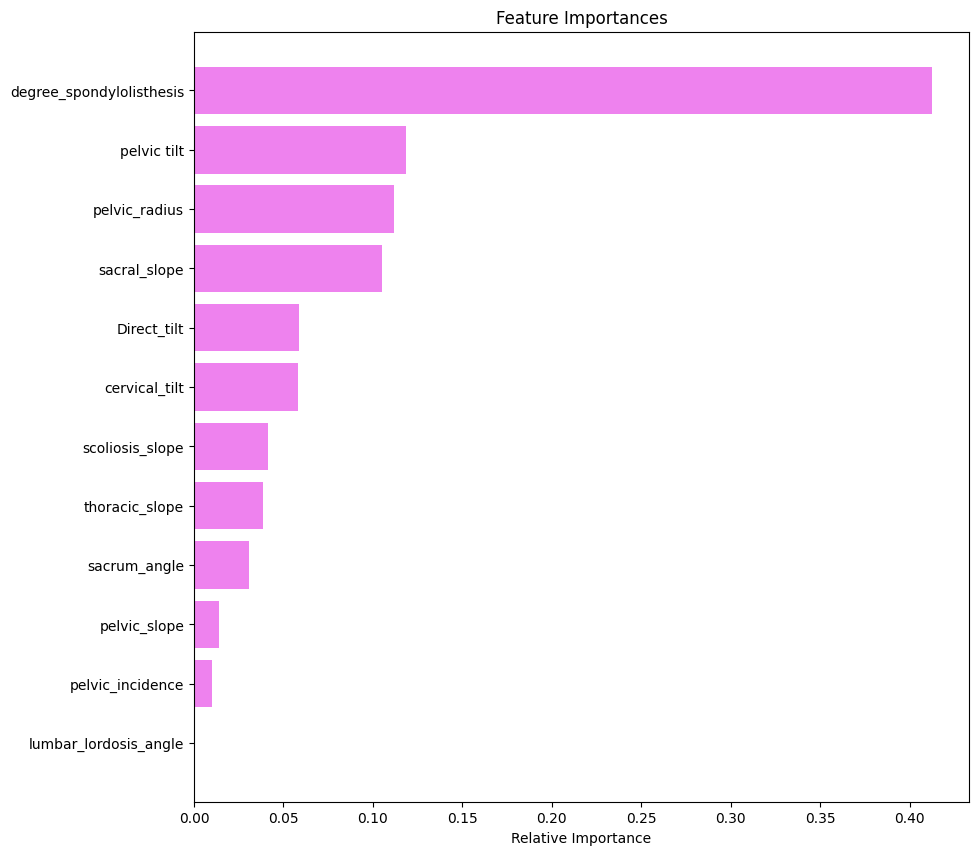

In [72]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

Maximum depth: [5,10,15, None],
criterion: ['gini','entropy'],
splitter: ['best','random']
Set cv = 3 in grid search
Set scoring = 'recall' in grid search

In [121]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth' : [5,10,15,None],
               'criterion' : ['gini', 'entropy'],
              'splitter': ['best','random']
              # 'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              # 'max_leaf_nodes' : [2, 3, 5, 10],
              # 'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

In [122]:
print('Best Criterion:', estimator.criterion)
print('Best max_depth:', estimator.max_depth)
print('splitter:', estimator.splitter)
print('scorer', estimator.best_estimator_)
# ; print(estimator.best_estimator_.get_params()['DecisionTreeClassifier'])

Best Criterion: entropy
Best max_depth: 10
splitter: random


AttributeError: ignored

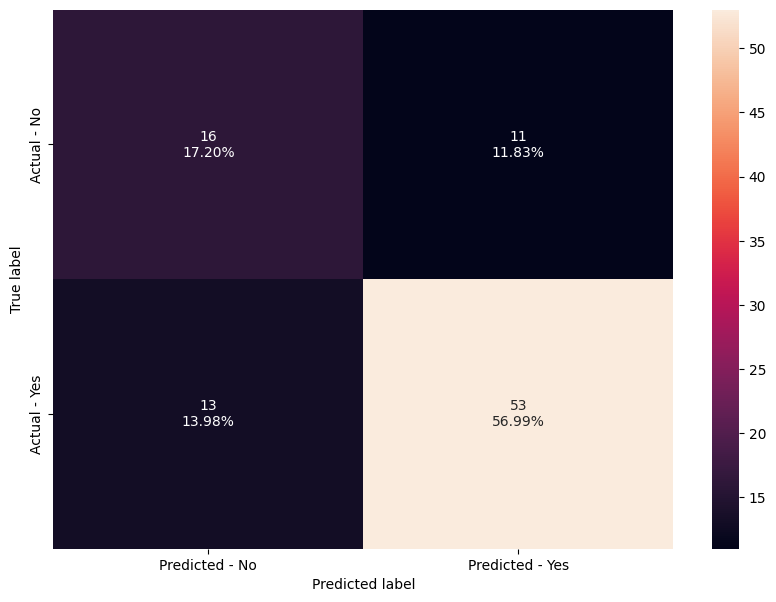

In [123]:
make_confusion_matrix(estimator,y_test)

In [75]:
get_recall_score(estimator)

Recall on training set :  0.9791666666666666
Recall on test set :  0.8636363636363636


In [ ]:
get_prec

In [110]:
get_recall_score(estimator)

Recall on training set :  0.9652777777777778
Recall on test set :  0.7727272727272727


In [111]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    imputer = KNNImputer(n_neighbors=2)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')

    print(f)

NameError: ignored